Shuohe Ren
U11807977

In [2]:
#2a
import numpy as np
import sklearn.linear_model as LM
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


def import_data(X, Y):
    X = np.load(X)
    y = np.load(Y)
    return X, y

X, y = import_data("mnist_data.npy", "mnist_labels.npy")
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [3]:
#2b
def accuracy_cal(prediction, Testy):
    count = 0
    for i in range(len(prediction)):
        if prediction[i] == int(Testy[i]):
            count+=1
    accuracy = round(count / len(prediction) * 100, 4
    )
    print(accuracy, "%")
    return accuracy



lr = LM.LogisticRegression(max_iter=500, n_jobs=-2)



lr.fit(train_X, train_y)
predict = lr.predict(train_X)
accuracy_cal(predict, train_y)
predict = lr.predict(test_X)
accuracy_cal(predict, test_y)

99.3988 %
88.8333 %


88.8333

100.0 %
96.6905 %
98.1131 %
96.119 %
97.2917 %
95.5714 %
96.8452 %
95.2619 %
96.5238 %
95.1905 %
96.1726 %
94.8571 %
95.9583 %
94.5476 %
95.6369 %
94.1667 %
95.3393 %
94.1429 %
95.125 %
94.0238 %
94.9286 %
93.7381 %
94.7202 %
93.5238 %
94.506 %
93.5952 %


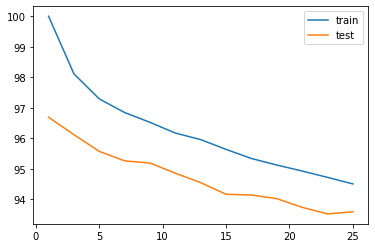

In [4]:
#2c
graph_k = []
graph_knn_train = []
graph_knn_test = []
for k in range(1, 26, 2):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-2)
    knn.fit(train_X, train_y)
    graph_k.append(k)
    knn__train = accuracy_cal(knn.predict(train_X), train_y)
    graph_knn_train.append(knn__train)
    knn_test = accuracy_cal(knn.predict(test_X), test_y)
    graph_knn_test.append(knn_test)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(graph_k, graph_knn_train, label='train')
ax.plot(graph_k, graph_knn_test, label='test')
ax.legend()
plt.show()

#2d
As k increases, the train and the test accuracy decrease. So the best value of k is 1

In [ ]:
#2e
# len(train_X)
graph_train=[]   
graph_test=[]
for i in range(5):
    number_ = np.random.choice(train_X.shape[0],(i+1)*3000,replace=False)
    X_subtrain = train_X[number_]   
    y_subtrain = train_y[number_]
    knn_ = KNeighborsClassifier(n_neighbors=1).fit(X_subtrain,y_subtrain)  # k=1
    graph_train.append(knn_.score(X_subtrain,y_subtrain))
    graph_test.append(knn_.score(test_X,test_y))
    
knn_ = KNeighborsClassifier(n_neighbors=1).fit(train_X,train_y)  
graph_train.append(knn_.score(train_X,train_y))
graph_test.append(knn_.score(test_X,test_y))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
k = [3000,6000,9000,12000,15000,16800]            
ax.plot(k,graph_train,label='train')                    
ax.plot(k,graph_test,label='test')      
ax.legend()              
plt.show()

#2f
Least Squares(Linear Regression)
pros:
1. It is simple and very easy to understand
2. It is the best linear unbiased estimator
3. It can be applied to a broad range of situations
cons:
1. It is very sensitive to outliers
2. It might not be reliable when train data is not normally distributed

Logistic Regression
pros:
1. It is very fast at classifying unknown data
2. It is not vulnerable to outliers
3. Good accuracy
cons:
1. It does not perform well when data points are dependent on each other
2. It assumes the linearity between the dependent variable and the independent variables

K-Nearest Neighbor
pros:
1. It is simple and easy to understand
2. It has no assumptions
3. It can be used both for classification and regression
cons:
1. It runs for a long time
2. Need to find the best value of k